In [40]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

% matplotlib inline

In [3]:
homicidios = pd.read_csv("data/censo_2000_pe/agressoes_arma_de_fogo_2000.csv")
homicidios = homicidios.rename(index=str, columns={"2000": "ano_2000"})
homicidios = homicidios.replace('-', np.nan)
homicidios['ano_2000'] = homicidios.ano_2000.astype("float64")
#homicidios

In [4]:
populacao = pd.read_csv("data/estimativa_populacao/populacao_pe_municipios.csv")
#populacao

In [5]:
microrregioes = pd.read_csv("data/microrregioes/municipios_microrregioes_pernambuco.csv")
#microrregioes

In [6]:
aux2 = pd.read_csv("data/censo_2000_pe/csv/edu_alunos_por_serie.csv")
#aux2.head()
codigo = aux2[['municipio', 'codigo_unidade_geografica']]
codigo = codigo.copy()
codigo['codigo_unidade_geografica'] = codigo['codigo_unidade_geografica'].apply(lambda x: int(x/10))
#codigo

In [7]:
codigo['municipio'] = codigo['municipio'].str.normalize('NFKD').\
                                                            str.encode('ascii', errors='ignore').str.decode('utf-8')
microrregioes['municipio'] = microrregioes['municipio'].str.normalize('NFKD').\
                                                            str.encode('ascii', errors='ignore').str.decode('utf-8')
microrregioes['microrregiao'] = microrregioes['microrregiao'].str.normalize('NFKD').\
                                                            str.encode('ascii', errors='ignore').str.decode('utf-8')
populacao['municipio'] = populacao['municipio'].str.normalize('NFKD').\
                                                            str.encode('ascii', errors='ignore').str.decode('utf-8')


In [8]:
tb_parcial = pd.concat([codigo.set_index("municipio"),\
                                microrregioes.set_index("municipio"), populacao.set_index("municipio")], axis= 1)
tb_parcial = tb_parcial.reset_index()
tb_parcial = tb_parcial.rename(columns={"index": "municipio"})

In [9]:
tb_parcial.head()


,municipio,codigo_unidade_geografica,microrregiao,pop
0,Abreu e Lima,260005,Recife,83486
1,Afogados da Ingazeira,260010,Vale do Pajeu,34524
2,Afranio,260020,Petrolina,14227
3,Agrestina,260030,Brejo,18713
4,Agua Preta,260040,Mata Meridional,25353


In [10]:
def filtro(codigo):
    aux=[]
    if (codigo >= 260001 and codigo <= 269999):
        aux.append(int(codigo))
    df_newcode = pd.DataFrame(aux, columns=["codigo_un"])
    return df_newcode

In [11]:
n_homicidios = pd.concat(map(lambda a: filtro(a.codigo_unidade_geografica).\
                             assign(homicidio = a.ano_2000), homicidios.itertuples()), ignore_index=True)
#n_homicidios.head()

In [12]:
tabela_ref = pd.concat([tb_parcial.set_index("codigo_unidade_geografica"),\
                                n_homicidios.set_index("codigo_un")], axis= 1)

In [13]:
tabela_ref.head()

,municipio,microrregiao,pop,homicidio
260005,Abreu e Lima,Recife,83486,32.0
260010,Afogados da Ingazeira,Vale do Pajeu,34524,8.0
260020,Afranio,Petrolina,14227,1.0
260030,Agrestina,Brejo,18713,8.0
260040,Agua Preta,Mata Meridional,25353,21.0


In [14]:
tabela_ref = tabela_ref.reset_index()
tabela_ref = tabela_ref.rename(columns={"index": "codigo_un"})
tabela_ref.head()

,codigo_un,municipio,microrregiao,pop,homicidio
0,260005,Abreu e Lima,Recife,83486,32.0
1,260010,Afogados da Ingazeira,Vale do Pajeu,34524,8.0
2,260020,Afranio,Petrolina,14227,1.0
3,260030,Agrestina,Brejo,18713,8.0
4,260040,Agua Preta,Mata Meridional,25353,21.0


In [15]:
def taxa(populacao, homicidios):
    aux=[]
    taxa_h = 100000*homicidios/populacao
    aux.append(taxa_h)
    df_taxa = pd.DataFrame(aux, columns=["taxa_homicidio"])
    return df_taxa

In [16]:
taxa = pd.concat(map(lambda a: taxa(a.pop, a.homicidio),\
                       tabela_ref.itertuples()), ignore_index=True)

In [17]:
tabela = pd.concat([tabela_ref, taxa], axis=1)
tabela.head()

,codigo_un,municipio,microrregiao,pop,homicidio,taxa_homicidio
0,260005,Abreu e Lima,Recife,83486,32.0,38.329780
1,260010,Afogados da Ingazeira,Vale do Pajeu,34524,8.0,23.172286
2,260020,Afranio,Petrolina,14227,1.0,7.028889
3,260030,Agrestina,Brejo,18713,8.0,42.751029
4,260040,Agua Preta,Mata Meridional,25353,21.0,82.830434


In [18]:
#tabela.to_csv('../2017-2-projeto-lbs4-eebls-ktcn/tabela_final.csv', index=False)
#tabela = pd.read_csv("../2017-2-projeto-lbs4-eebls-ktcn/tabela_final.csv")

In [19]:
def retirar_acento(dataframe):
    #dataframe['municipio'] = dataframe['municipio'].str.normalize('NFKD').\
                                                        #str.encode('ascii', errors='ignore').str.decode('utf-8')
    dataframe = dataframe.set_index('municipio')
    return dataframe

In [20]:
data_stack=[]

In [21]:
data = pd.read_csv("data/censo_2000_pe/educacao_pe/csv/pessoas_de_10_anos_ou_mais_de_idade.csv")
data_stack.append(data)
data = pd.read_csv("data/censo_2000_pe/educacao_pe/csv/pessoas_de_10_anos_ou_mais_de_idade_grupos_de_anos_de_estudo.csv")
data_stack.append(data)
data = pd.read_csv("data/censo_2000_pe/educacao_pe/csv/pessoas_que_frequentavam_creche_ou_escola.csv")
data_stack.append(data)
data = pd.read_csv("data/censo_2000_pe/trabalho_rendimento_pe/csv/pessoas_de_10_anos_ou_mais_de_idade.csv")
data_stack.append(data)
data = pd.read_csv("data/censo_2000_pe/trabalho_rendimento_pe/csv/pessoas_de_10_anos_ou_mais_de_idade_empregadas_no_trabalho_principal_da_semana_de_referencia.csv")
data_stack.append(data)
data = pd.read_csv("data/censo_2000_pe/trabalho_rendimento_pe/csv/pessoas_de_10_anos_ou_mais_de_idade_ocupadas_na_semana_de_referência.csv")
data_stack.append(data)
data = pd.read_csv("data/censo_2000_pe/trabalho_rendimento_pe/csv/valor_do_rendimento_nominal_mediano_mensal_do_trabalho_principal_das_pessoas_de_10_anos_ou_mais_de_idade.csv")
data_stack.append(data)
data = pd.read_csv("data/censo_2000_pe/indicadores_sociais_pe/csv/domicilios_particulares_permanentes.csv")
data_stack.append(data)
data = pd.read_csv("data/censo_2000_pe/indicadores_sociais_pe/csv/domicilios_particulares_permanentes_por_situacao_destino_do_lixo.csv")
data_stack.append(data)
data = pd.read_csv("data/censo_2000_pe/indicadores_sociais_pe/csv/domicilios_particulares_permanentes_por_situacao_tipo_abastecimento_agua.csv")
data_stack.append(data)
data = pd.read_csv("data/censo_2000_pe/indicadores_sociais_pe/csv/domicilios_particulares_permanentes_por_situacao_tipo_esgotamento_sanitario.csv")
data_stack.append(data)
data = pd.read_csv("data/censo_2000_pe/indicadores_sociais_pe/csv/media_de_anos_de_estudo_da_populacao_de_10_anos_ou_mais_de_idade.csv")
data_stack.append(data)
data = pd.read_csv("data/censo_2000_pe/indicadores_sociais_pe/csv/numero_medio_moradores_domicilios_particulares_permanentes_classe_de_salario.csv")
data_stack.append(data)
data = pd.read_csv("data/censo_2000_pe/indicadores_sociais_pe/csv/pessoas_de_60_ou_mais_anos_de_idade_aposentados_ou_nao.csv")
data_stack.append(data)
data = pd.read_csv("data/censo_2000_pe/indicadores_sociais_pe/csv/pessoas_de_60_ou_mais_anos_de_idade_por_classe_de_contribuicao.csv")
data_stack.append(data)
data = pd.read_csv("data/censo_2000_pe/indicadores_sociais_pe/csv/populacao_pe.csv")
data_stack.append(data)
data = pd.read_csv("data/censo_2000_pe/indicadores_sociais_pe/csv/populacao_residente_pe.csv")
data_stack.append(data)
data = pd.read_csv("data/censo_2000_pe/indicadores_sociais_pe/csv/populacao_residente_por_cor_pe.csv")
data_stack.append(data)
data = pd.read_csv("data/censo_2000_pe/indicadores_sociais_pe/csv/propocao_de_pessoas_de_15_anos_ou_mais_de_idade_com_menos_de_4_anos_de_estudo.csv")
data_stack.append(data)
data = pd.read_csv("data/censo_2000_pe/indicadores_sociais_pe/csv/proporcao_de_domicilios_com_criancas_de_ate_14_anos_de_idade.csv")
data_stack.append(data)
#data = pd.read_csv("data/censo_2000_pe/indicadores_sociais_pe/csv/proporcao_de_pessoas_de_10_anos_ou_mais_de_idade_ocupadas_na_semana_de_referência.csv")
#data_stack.append(data)
data = pd.read_csv("data/censo_2000_pe/indicadores_sociais_pe/csv/proporcao_de_pessoas_de_10_anos_ou_mais_de_idade_ocupadas_na_semana_de_referência_por_contribuicao_instituto_previdencia.csv")
data_stack.append(data)
data = pd.read_csv("data/censo_2000_pe/indicadores_sociais_pe/csv/proporcao_de_pessoas_de_10_anos_ou_mais_de_idade_ocupadas_na_semana_de_referência_por_posicao_na_ocupacao.csv")
data_stack.append(data)
data = pd.read_csv("data/censo_2000_pe/indicadores_sociais_pe/csv/taxa_de_escolarizacao_por_idade.csv")
data_stack.append(data)

In [22]:
for x in range(0,23):
    data_stack[x] = retirar_acento(data_stack[x])

In [23]:
data_s = pd.concat(data_stack, axis=1)
#teste.head()

In [24]:
tabela = tabela.set_index('municipio')
#tabela.head()

In [25]:
tabela_final = pd.concat([tabela,data_s], axis=1).drop('codigo_unidade_geografica', 1)
tabela_final = tabela_final.reset_index()
tabela_final = tabela_final.rename(columns={"index": "municipio"})
tabela_final.head()

,municipio,codigo_un,microrregiao,pop,homicidio,taxa_homicidio,pessoas_de_10_anos_ou_mais_de_idade_total,pessoas_de_10_anos_ou_mais_de_idade_alfabetizadas,pessoas_de_10_anos_ou_mais_de_idade_taxa_de_alfabetizacao_(%),pessoas_de_10_anos_ou_mais_de_idade_10_a_14_anos_total,...,"pessoas_de_10_anos_ou_mais_de_idade,_ocupadas_na_semana_de_referencia_por_posicao_na_ocupacao_(%)_empregado_sem_carteira","pessoas_de_10_anos_ou_mais_de_idade,_ocupadas_na_semana_de_referencia_por_posicao_na_ocupacao_(%)_trabalhador_domestico_total","pessoas_de_10_anos_ou_mais_de_idade,_ocupadas_na_semana_de_referencia_por_posicao_na_ocupacao_(%)_trabalhador_domestico_com_carteira","pessoas_de_10_anos_ou_mais_de_idade,_ocupadas_na_semana_de_referencia_por_posicao_na_ocupacao_(%)_trabalhador_domestico_sem_carteira",taxa_de_escolarizacao_(%)_total,taxa_de_escolarizacao_(%)_por_grupos_de_idade_0_a_6_anos,taxa_de_escolarizacao_(%)_por_grupos_de_idade_7_a_14_anos,taxa_de_escolarizacao_(%)_por_grupos_de_idade_15_a_17_anos,taxa_de_escolarizacao_(%)_por_grupos_de_idade_18_a_24_anos,taxa_de_escolarizacao_(%)_por_grupos_de_idade_25_anos_ou_mais
0,Abreu e Lima,260005,Recife,83486,32.0,38.329780,72426.0,63709.0,87.964267,8979.0,...,17.256190,6.893336,1.778760,5.114576,32.530620,41.945898,95.584063,78.143800,33.812041,3.816416
1,Afogados da Ingazeira,260010,Vale do Pajeu,34524,8.0,23.172286,26208.0,19629.0,74.896978,3807.0,...,18.747716,5.147196,0.534028,4.613167,29.143026,25.394765,89.645511,68.337465,27.082396,2.221973
2,Afranio,260020,Petrolina,14227,1.0,7.028889,11848.0,8158.0,68.855503,1824.0,...,23.356101,3.427852,0.038902,3.388949,33.557669,21.179424,95.555202,75.170484,32.956231,5.897674
3,Agrestina,260030,Brejo,18713,8.0,42.751029,15728.0,9599.0,61.031282,2263.0,...,23.695550,4.252085,0.665384,3.586701,31.677327,40.297104,92.067825,66.086919,25.231703,3.157923
4,Agua Preta,260040,Mata Meridional,25353,21.0,82.830434,21824.0,14347.0,65.739553,3784.0,...,24.163987,5.626785,1.142118,4.484667,33.183783,14.363835,86.474907,67.870384,37.045502,6.286884


In [26]:
tabela_final.drop('codigo', axis=1, inplace=True)
tabela_final.drop('pessoas_de_10_anos_ou_mais_de_idade_total', axis=1, inplace=True)
tabela_final.drop('numero_medio_de_moradores_por_domicilio_particular_permanente_classes_de_salario_minimo_ate_1/4', axis=1, inplace=True)
tabela_final.drop('numero_medio_de_moradores_por_domicilio_particular_permanente_classes_de_salario_minimo_de_2_a_3', axis=1, inplace=True)
tabela_final.drop('numero_medio_de_moradores_por_domicilio_particular_permanente_classes_de_salario_minimo_mais_de_3', axis=1, inplace=True)
tabela_final.drop('microrregiao', axis=1, inplace=True)
tabela_final.drop('codigo_un', axis=1, inplace=True)
tabela_final.drop('homicidio', axis=1, inplace=True)
#list(tabela_final)

In [27]:
rename_columns = {}

for column in tabela_final.columns:
    if (',' in column):
        rename_columns[column] = column.replace(',','')
        
tabela_final.rename(columns=rename_columns, inplace=True)

In [29]:
tabela_final.set_index('municipio',inplace=True)
tabela_final = tabela_final.fillna(0)

In [48]:
#tabela_final.to_csv('../2017-2-projeto-lbs4-eebls-ktcn/tabela_final.csv', index=False)
tabela = pd.read_csv("../2017-2-projeto-lbs4-eebls-ktcn/tabela_final.csv")

In [51]:

not_in_columns = ['taxa_homicidio','pessoas_de_10_anos_ou_mais_de_idade_ocupadas_na_semana_de_referencia_total',\
                  'domicilios_particulares_permanentes_por_situacao_do_domicilio_rural__destino_do_lixo(%)_coletado',\
                 'domicilios_particulares_permanentes_por_situacao_do_domicilio_rural__destino_do_lixo(%)_queimado_ou_enterrado',\
                 'domicilios_particulares_permanentes_por_situacao_do_domicilio_rural__destino_do_lixo(%)_outra_forma_(1)',\
                 'domicilios_particulares_permanente_por_situacao_do_domicilio_rural__tipo_de_esgotamento_sanitario(%)_rede_geral',\
                 'domicilios_particulares_permanente_por_situacao_do_domicilio_rural__tipo_de_esgotamento_sanitario(%)_fossa_septica',\
                 'domicilios_particulares_permanente_por_situacao_do_domicilio_rural__tipo_de_esgotamento_sanitario(%)_outra_forma_(1)',\
                 'domicilios_particulares_permanente_por_situacao_do_domicilio_rural__sem_instalacao_sanitaria(%)']
which_columns = []

x = tabela_final['taxa_homicidio'].values
for column in tabela_final.columns:
    if (column not in not_in_columns):
        y = tabela_final[column].values
        model = linregress(x,y)
        if (model.pvalue <= 0.000000001):
            which_columns.append(column)

In [52]:
which_columns

['pessoas_de_10_anos_ou_mais_de_idade_20_anos_ou_mais_taxa_de_alfabetizacao_(%)',
 'pessoas_de_10_anos_ou_mais_de_idade_grupos_de_anos_de_estudo_sem_instrucao_e_menos_de_1_ano',
 'pessoas_de_10_anos_ou_mais_de_idade_grupos_de_anos_de_estudo_1_a_3_anos',
 'pessoas_de_10_anos_ou_mais_de_idade_empregadas_no_trabalho_principal_da_semana_de_referencia_subgrupo_do_emprego_no_trabalho_principal_demais_empregados_categoria_do_emprego_no_trabalho_principal__outros_sem_carteira_de_trabalho_assinada_(1)',
 'media_de_anos_de_estudo_da_populacao_de_10_anos_ou_mais_de_idade_total',
 'populacao_situacao_do_domicilio_(%)_urbana',
 'populacao_situacao_do_domicilio_(%)_rural',
 'populacao_proporcao_de_pessoas_naturais_dos_municipios_(%)',
 'proporcao_de_pessoas_de_15_anos_ou_mais_de_idade_com_menos_de_4_anos_de_estudo_(%)_por_sexo_homem',
 'proporcao_de_domicilios_com_criancas_de_ate_14_anos_de_idade_com_rendimento_domiciliar_per_capita_de_ate_1/2_salario_minimo_e_com_responsavel_com_menos_de_4_anos_de_

/home/edymiretienne/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


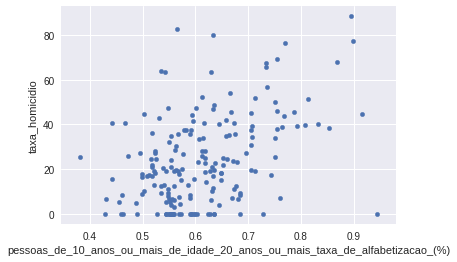

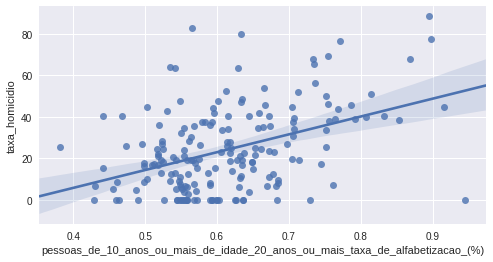

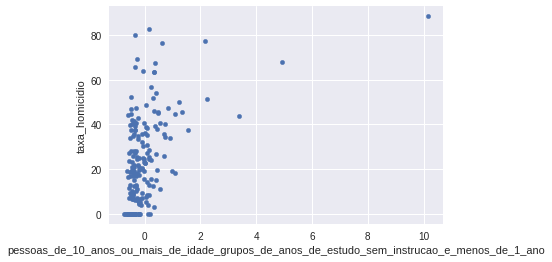

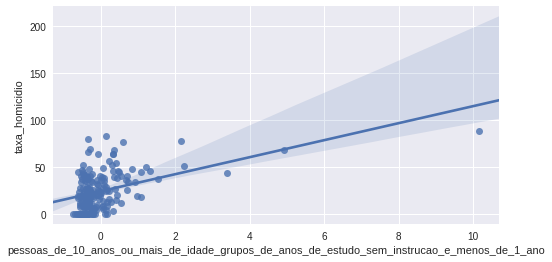

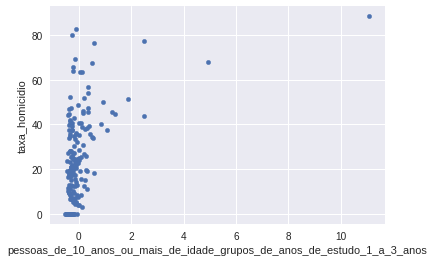

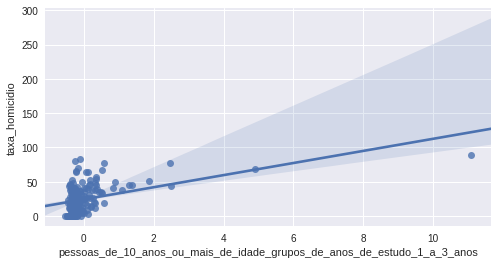

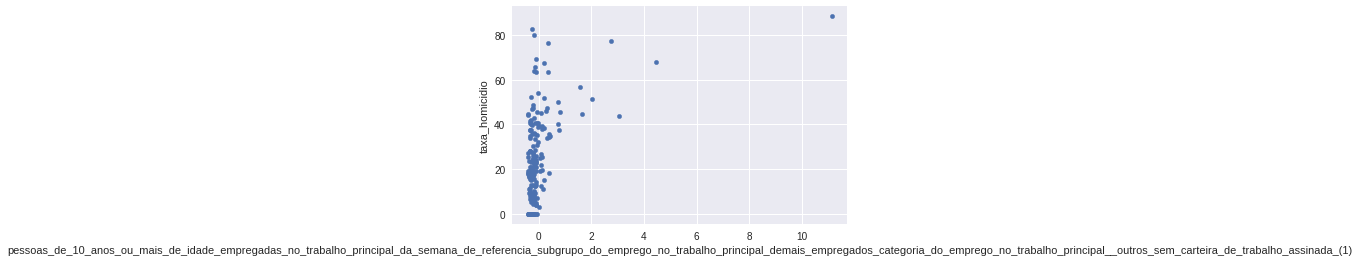

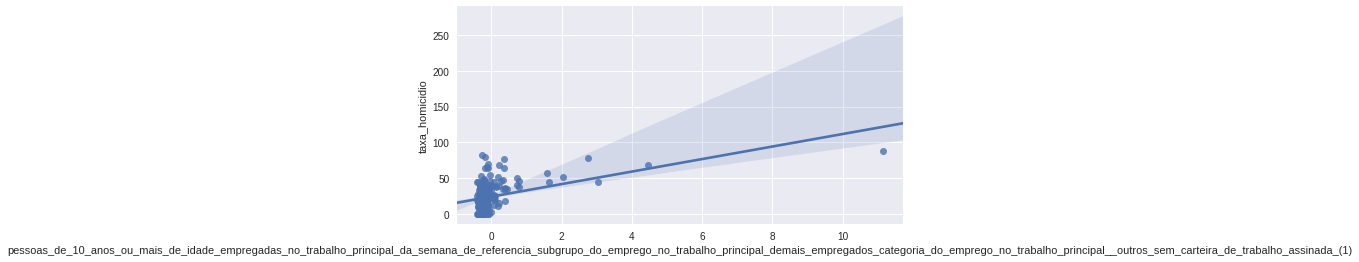

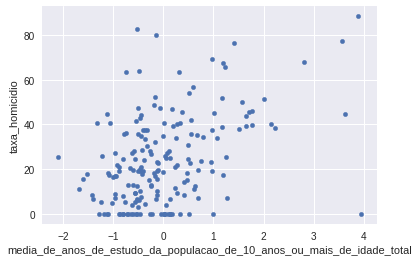

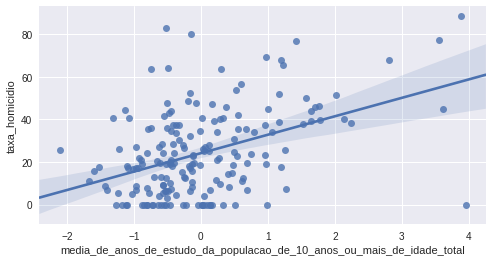

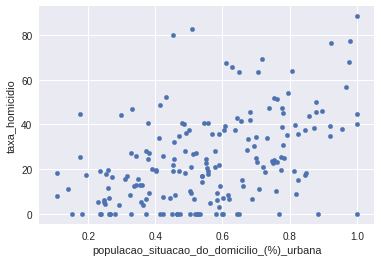

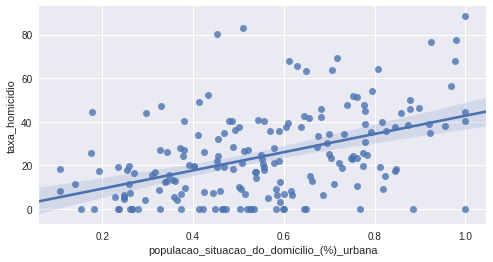

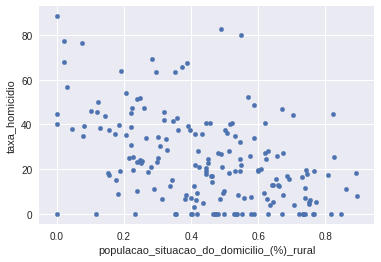

In [ ]:
df = tabela_final.copy()
for column in which_columns:
    if ('(%)' not in column):
        #print(column)
        df[column] = df[column].apply(lambda x: (x - df[column].mean()) / df[column].std())
        #df[column] = df[column].apply(lambda x: np.log10(x))
    else:
        df[column] = df[column].apply(lambda x: x/100)
    df.plot.scatter(x=column, y='taxa_homicidio')
    plt.subplots(figsize=(8,4))
    sns.regplot(column, 'taxa_homicidio',data=df)

In [47]:
df['pessoas_de_10_anos_ou_mais_de_idade_grupos_de_anos_de_estudo_sem_instrucao_e_menos_de_1_ano']

municipio
Abreu e Lima              0.099984
Afogados da Ingazeira    -0.025387
Afranio                  -0.291263
Agrestina                -0.236340
Agua Preta                0.137426
Aguas Belas               0.538719
Alagoinha                -0.431246
Alianca                   0.073631
Altinho                  -0.032302
Amaraji                  -0.226817
Angelim                  -0.505086
Aracoiaba                -0.381672
Araripina                 1.075167
Arcoverde                 0.333767
Barra de Guabiraba       -0.416374
Barreiros                 0.099723
Belem de Maria           -0.439857
Belem de Sao Francisco   -0.288915
Belo Jardim               0.910919
Betania                  -0.454599
Bezerros                  0.827556
Bodoco                    0.136382
Bom Conselho              0.283149
Bom Jardim                0.234488
Bonito                    0.323852
Brejao                   -0.509131
Brejinho                 -0.555052
Brejo da Madre de Deus    0.336246
Buenos Air